# EDA of Walmart Recruiting: Trip Type Classification Dataset

In [33]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns
# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

## Read the dataset and analyse file structure

In [34]:
data = pd.read_csv('data/train.csv')
data.head(10)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,"68,113,152,929.00",-1,FINANCIAL SERVICES,"1,000.00"
1,30,7,Friday,"60,538,815,980.00",1,SHOES,"8,931.00"
2,30,7,Friday,"7,410,811,099.00",1,PERSONAL CARE,"4,504.00"
3,26,8,Friday,"2,238,403,510.00",2,PAINT AND ACCESSORIES,"3,565.00"
4,26,8,Friday,"2,006,613,744.00",2,PAINT AND ACCESSORIES,"1,017.00"
5,26,8,Friday,"2,006,618,783.00",2,PAINT AND ACCESSORIES,"1,017.00"
6,26,8,Friday,"2,006,613,743.00",1,PAINT AND ACCESSORIES,"1,017.00"
7,26,8,Friday,"7,004,802,737.00",1,PAINT AND ACCESSORIES,"2,802.00"
8,26,8,Friday,"2,238,495,318.00",1,PAINT AND ACCESSORIES,"4,501.00"
9,26,8,Friday,"2,238,400,200.00",-1,PAINT AND ACCESSORIES,"3,565.00"


In [35]:
#data shape
print "Data Shape:", data.shape
totalrows = data.shape[0]
totalcolumns = data.shape[1]

Data Shape: (647054, 7)


So there are <b>647054</b> rows and <b>7</b> columns(variables) in total.

Data fields(variables) explanation as described in <b><a href='https://www.kaggle.com/c/walmart-recruiting-trip-type-classification/data'>Kaggle</a></b>  

<b>TripType</b> - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.<br>
<br>
<b>VisitNumber</b> - an id corresponding to a single trip by a single customer
<br>
<br><b>Weekday</b> - the weekday of the trip<br>
<br>
<b>Upc</b> - the UPC number of the product purchased<br>
<br>
<b>ScanCount</b> - the number of the given item that was purchased. A negative value indicates a product return.
<br>
<br>
<b>DepartmentDescription</b> - a high-level description of the item's department<br>
<br>
<b>FinelineNumber</b> - a more refined category for each of the products, created by Walmart

## Check for duplicate rows in the dataset

In [121]:
#data.duplicated() returns a Series of length index and true/false(repetation) for each index.
#value_counts() returns count of unique values present in the Pandas Series
duplicate_rows=data.duplicated().value_counts()
#duplicate_rows[1]

There are <b>5704</b> duplicate rows present in the Dataset. It is normal behavior in real world to punch(scan) product multiple times(a behavior which caused duplication in dataset) than writing scancount in software.

## Lets check for variables datatypes

In [37]:
dtypes_df = data.dtypes.reset_index()
dtypes_df.columns=['Variable', 'DataType']
dtypes_df

,Variable,DataType
0,TripType,int64
1,VisitNumber,int64
2,Weekday,object
3,Upc,float64
4,ScanCount,int64
5,DepartmentDescription,object
6,FinelineNumber,float64


In [38]:
#count each data type present in dataset
dtypes_df.columns=['count', 'column_type']
dtypes_df.groupby('column_type').aggregate('count')

,count
column_type,
int64,3
float64,2
object,2


3 variables are of type <b>int</b>, 2 are of type <b>float</b> and <b>object</b>.

## Lets Check for Null Values in the dataset

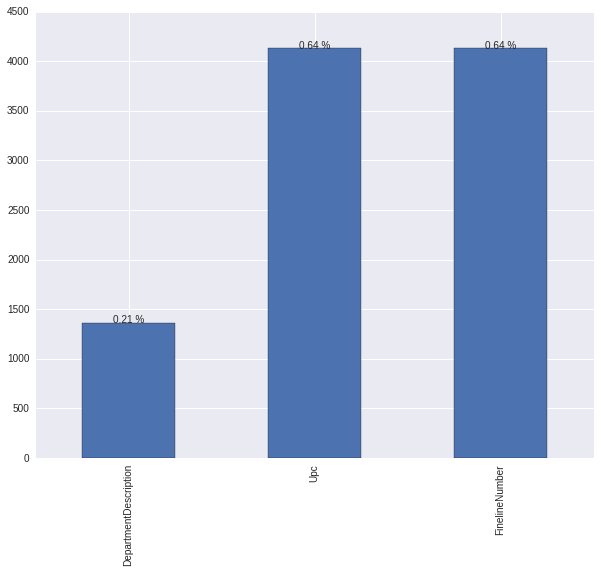

In [39]:
totalrows=data.shape[0]
plt.figure(figsize=(10,8))
missing_df = data.isnull().sum()
missing_df = missing_df[missing_df>0]
missing_df.sort_values(inplace=True)
ax = missing_df.plot.bar()
for p in ax.patches:
    height=p.get_height()
    percent = (height*100)/totalrows
    ax.text((p.get_x() + p.get_width()/2), p.get_height()+3, '{:1.2f} %'.format(percent), ha='center')

Null values are max in fields <b>Upc</b> and <b>FinelineNumber</b>.

# Analyse Variables in the dataset

## Lets Analyse Target variable TripType.

In [40]:
#check for unique values in TripType
print "Below are the {} value types present in the TripType: \n"\
.format(len(data.TripType.unique()))
for triptype in data.TripType.unique():
    print triptype

Below are the 38 value types present in the TripType: 

999
30
26
8
35
41
21
6
42
7
9
39
25
38
15
36
20
37
32
40
5
3
4
24
33
43
31
27
34
18
29
44
19
23
22
28
14
12


We have <b>38</b> different trip types (Classes to classify) present.


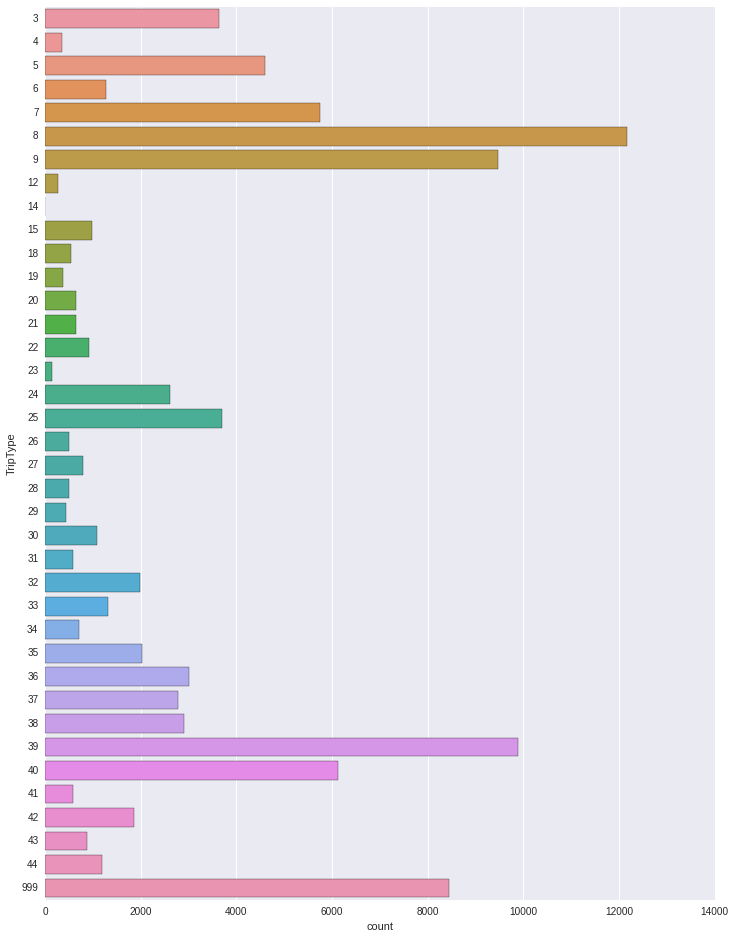

In [41]:
#lets check which type has occoured most
triptypes = data.drop_duplicates(subset=['VisitNumber'])
plt.figure(figsize=(12,16))
sns.countplot(y='TripType', data=triptypes)

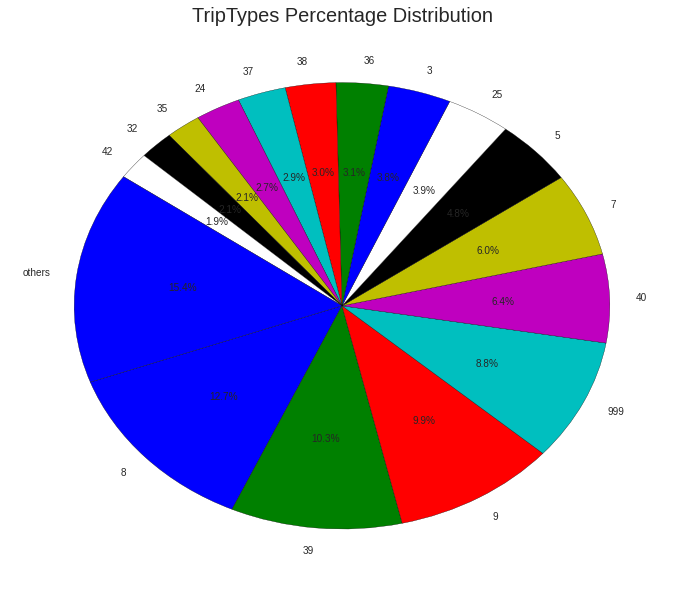

In [106]:
#pie graph to check distribution in percentage of trip types
plt.figure(figsize=(12,10))
#find percentages of each trip types
triptypes_percentage = (triptypes['TripType'].value_counts()/len(triptypes))*100
#select trip having percentage only greater than 1
triptypes_max = triptypes_count[triptypes_percentage > 1.5]
#labels and sizes for pie chart
labels = (np.array(triptypes_max.index))
sizes = np.array(triptypes_max.values)
#others to make percentage sum equal to 100
others =  triptypes_count[triptypes_count <= 1.5].sum()
labels = np.append(labels, ['others'])
sizes = np.append(sizes, [others])

#plot pie graph
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)#startangle: rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
plt.title('TripTypes Percentage Distribution', fontsize=20)
plt.show()

With Intuition that visit number is same accros one trip, we can conclude that there are some trips which have occoured very less with trip type 8 and 39 occoured most.<br> <br>
<b>Note:

## Variable VisitNumber - an id corresponding to a single trip by a single customer 

In [43]:
#check for unique values in this variable
len(data.VisitNumber.unique())

95674

It means this dataset consists of <b>95674</b>  trips by customers. we will further try to prove it in later section.Or we can say that data set consists  of <b>95674</b> different customers.

## Variable Weekday - the weekday of the trip

In [84]:
#check for unique values in this variable
for day in data.Weekday.unique():
    print day

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday


Datset contains shoping record of every day in week. Let's check which day was more busy.

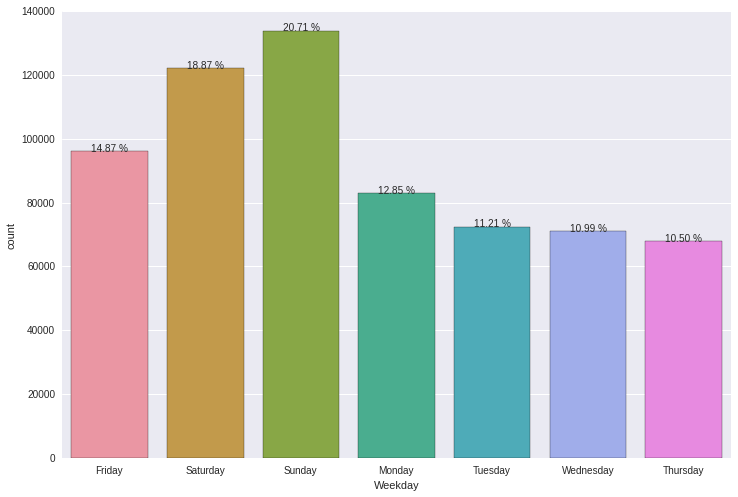

In [45]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Weekday', data=data)
for p in ax.patches:
    height=p.get_height()
    percent = (height*100)/totalrows
    ax.text((p.get_x() + p.get_width()/2), p.get_height()+5, '{:1.2f} %'.format(percent), ha='center')

Sundays were most busy days at walmart and thursday's were least least.

## Varible Upc - the UPC number of the product purchased

In [122]:
#check for unique values in the Upc
#len(data.Upc.unique())

It means there are <b>97715</b> different products present in the dataset.

## Variable ScanCount - the number of the given item that was purchased. A negative value indicates a product return.

In [86]:
data.ScanCount.describe()

count             647,054.00
mean                    1.11
std                     0.70
min                   -12.00
25%                     1.00
50%                     1.00
75%                     1.00
max                    71.00
Name: ScanCount, dtype: float64

It means there is a product in list whose quantity in the checkout bill is 71 and minimum ScanCount is -12. Lets see if we can find that product later.

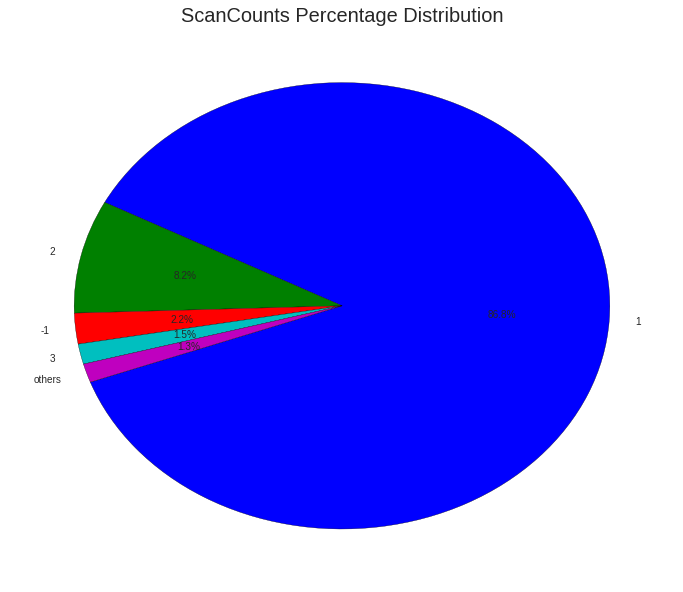

In [115]:
#check percentage of scancounts in dataset
plt.figure(figsize=(12,10))
#finding percentage
scancounts_percentage = (data['ScanCount'].value_counts()/len(data))*100

#seperate values greater than 1.4 to visualise pie chart easily
scancounts_max = scancounts_percentage[scancounts_percentage > 1.4]
labels = (np.array(scancounts_max.index))
sizes = (np.array(scancounts_max))

#sum percentage of all other values togather
others = scancounts_percentage[scancounts_percentage <= 1.4].sum()
labels = np.append(labels, ['others'])
sizes = np.append(sizes, [others])

#startangle: rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title('ScanCounts Percentage Distribution', fontsize=20)
plt.show()

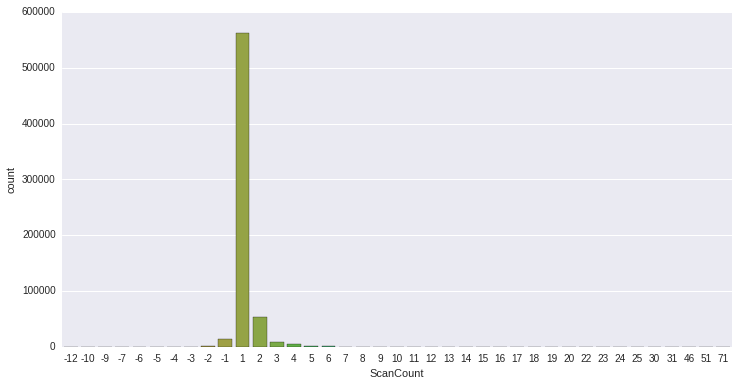

In [123]:
#bar plot for ScanCounts
plt.figure(figsize=(12,6))
sns.countplot(x='ScanCount', data=data)

Above Pie Graph and Bar Graph show that most of the time a product was purchased only once(had scan count of one).
<br>
<br>
<b>Note:</b> In real world it is normal to punch(scan product) twice than increasing scan count, so there might be the case why scancount 1 is more in percentage.

In [50]:
#which product has scan counts of 71
maxscans = data[data.ScanCount == 71]
maxscans

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
478028,32,142397,Saturday,"4,178,900,115.00",71,GROCERY DRY GOODS,"3,120.00"


Only one product in all buckets has scan count of 71.
<br>


<b>We know negative number represents returned product and positive represents purchased product, lets find how many products wer purchased or returned.</b>

In [51]:
purchaseditems_df = data[data.ScanCount>0]
purchaseditems_count = purchaseditems_df.shape[0]
print "Pucrchased Items", purchaseditems_count

Pucrchased Items 631596


In [52]:
returneditems_df = data[data.ScanCount<0]
returneditems_count = returneditems_df.shape[0]
returneditems_df = data[data.ScanCount<0]
returneditems_count = returneditems_df.shape[0]
print "Returned Items", returneditems_count

Returned Items 15458


It means <b> 15458 </b> times a product was returned and <b>631596</b> times product was purchased in different trips.In later section we will try to find returned orders impact on other variables. And we will always try to find that what products were purchased in maximum trips and which were returned and also we will look the quantity.

## Variables DepartmentDescription - a high-level description of the item's department

In [114]:
#list unique departments
print "There are {} unique Departments present in the dataset".format(len(data.DepartmentDescription.unique()))

There are 69 unique Departments present in the dataset


Lets findout which Department items were purchased more.

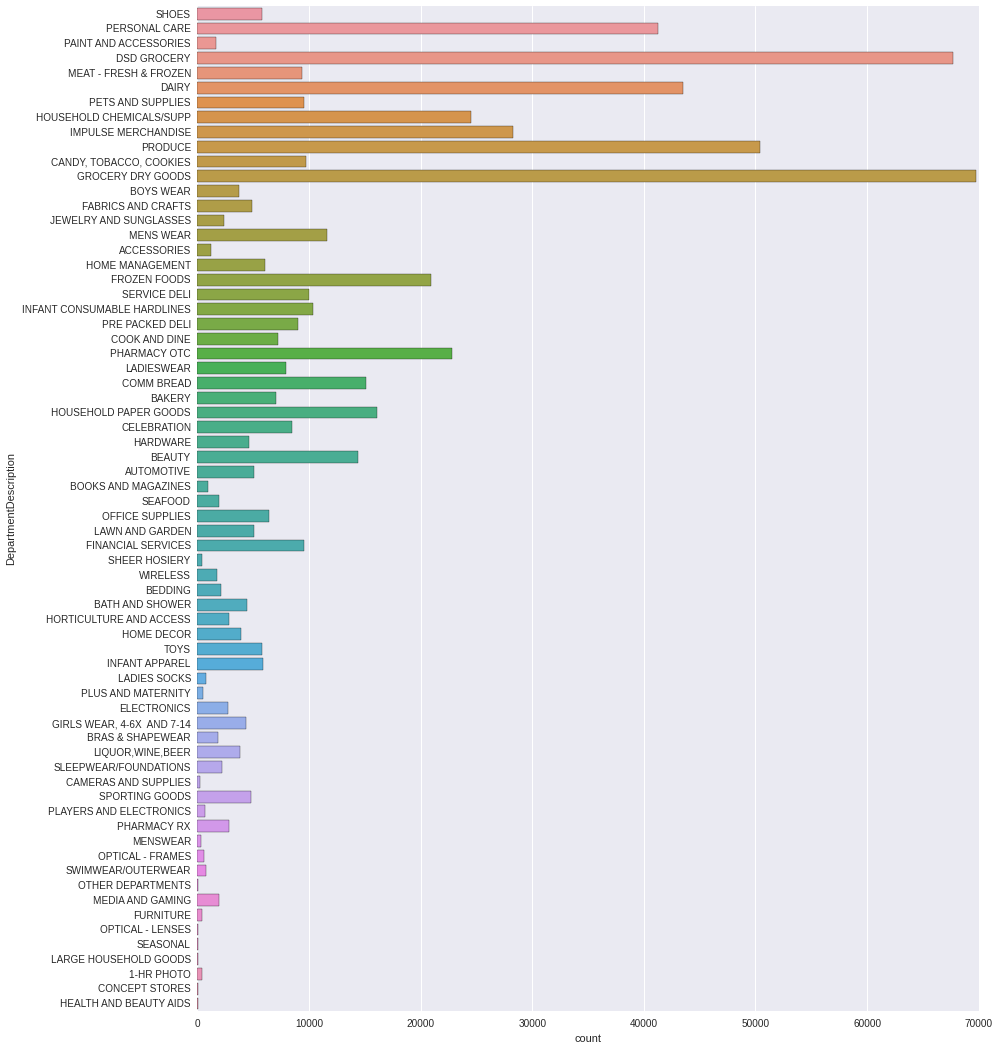

In [54]:
plt.figure(figsize=(14,18))
sns.countplot(y='DepartmentDescription', data=purchaseditems_df)

Above we can see that mostly sold items are of department Produce, Dry Grocery and Personal care. There are also some items which are not sold frequently. In later section we will try to find out if we should keep them for our model or not.
<br>
Now lets find that which department items were returned more.

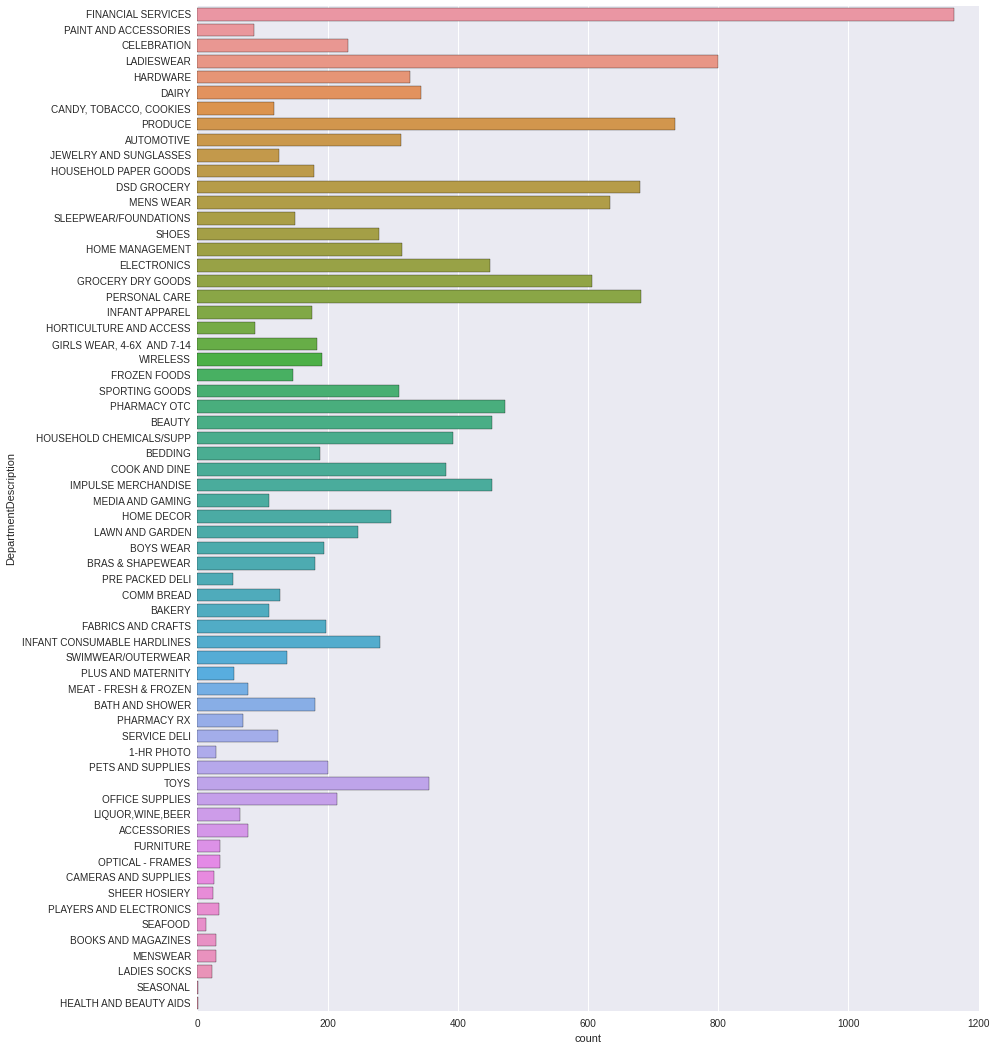

In [55]:
plt.figure(figsize=(14,18))
sns.countplot(y='DepartmentDescription', data=returneditems_df)

We can see that Financial services and ladies-wears departments items were returned most.

## FinelineNumber - a more refined category for each of the products, created by Walmart

In [56]:
#check for unique product categories by walmart
len(data.FinelineNumber.unique())

5196

It seems that walmart has refiened category and divided products into 5196 categories. We will see which fineline number fall in to which dept. 

<b>In next section we will relate variables with target variables and hope that we will find something usefull.</b>